##### import libraries for data analysis

In [1]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Wall time: 14.5 s


In [3]:
from imblearn.over_sampling import SMOTE

#### To get the current working directory

In [4]:
%%time
import os
os.getcwd()

Wall time: 0 ns


##### Read the data of given datasets

In [5]:
%%time
OperatingConditionsData = pd.read_csv("OperatingConditionsData.csv")
MachinesDetails = pd.read_csv("MachinesDetails.csv")
ComponentServiceLog = pd.read_csv("ComponentServiceLog.csv")
ComponentReplacementLog = pd.read_csv("ComponentReplacementLog.csv")
ComplaintsLog = pd.read_csv("ComplaintsLog.csv")
Train = pd.read_csv("Train.csv")
Test = pd.read_csv("Test.csv")

Wall time: 29.7 s


#### ComplaintsLog

In [6]:
%%time
ComplaintsLog.head()

Wall time: 999 µs


,Year,Month,Day,Time,MachineID,ErrorID
0,2017,1,6,06:00:00,MID10889,error1
1,2017,2,20,06:00:00,MID10889,error2
2,2017,2,20,06:00:00,MID10889,error3
3,2017,2,22,04:00:00,MID10889,error4
4,2017,3,22,06:00:00,MID10889,error1


##### * Merging year,date,month and time into singlecolumn which is DateTime
##### * Dropping unwanted columns
##### * Final ComplaintsLog data

In [7]:
%%time
ComplaintsLog['timestamp'] = pd.to_datetime(ComplaintsLog.Year*10000+ComplaintsLog.Month*100+ComplaintsLog.Day,format="%Y%m%d")
ComplaintsLog['DateTime'] = pd.to_datetime(ComplaintsLog['timestamp'].apply(str)+" "+ComplaintsLog['Time'])
ComplaintsLog.drop(['Year','Day','Month','Time','timestamp'],axis=1,inplace=True)
ComplaintsLog.head()

Wall time: 6.27 s


In [8]:
%%time
print("Total number of ComplaintsLog records: %d" % len(ComplaintsLog.index))

Total number of ComplaintsLog records: 12628
Wall time: 999 µs


##### ComponentReplacementLog

In [9]:
%%time
ComponentReplacementLog.head()

Wall time: 0 ns


,Year,Month,Day,Time,MachineID,ComponentReplacement
0,2017,1,7,06:00:00,MID10889,Component1
1,2017,2,21,06:00:00,MID10889,Component2
2,2017,3,23,06:00:00,MID10889,Component1
3,2017,6,21,06:00:00,MID10889,Component2
4,2017,2,10,06:00:00,MID10898,Component2


##### * Merging year,date,month and time into singlecolumn which is DateTime
##### * Dropping unwanted columns
##### * Final ComponentReplacementLog data

In [10]:
%%time
ComponentReplacementLog['timestamp'] = pd.to_datetime(ComponentReplacementLog.Year*10000+ComponentReplacementLog.Month*100+ComponentReplacementLog.Day,format="%Y%m%d")
ComponentReplacementLog['DateTime'] = pd.to_datetime(ComponentReplacementLog['timestamp'].apply(str)+" "+ComponentReplacementLog['Time'])
ComponentReplacementLog.drop(['Year','Day','Month','Time','timestamp'],axis=1,inplace=True)
ComponentReplacementLog.head()

Wall time: 2.93 s


In [11]:
%%time
print("Total Number of ComponentReplacementLog Records: %d" %len(ComponentReplacementLog.index))

Total Number of ComponentReplacementLog Records: 7087
Wall time: 0 ns


##### ComponentServiceLog

In [12]:
%%time
ComponentServiceLog.head()

Wall time: 0 ns


,Year,Month,Day,Time,MachineID,ComponentAttended,ServiceType
0,2016,6,1,06:00:00,MID10889,Component1,ScheduledService
1,2016,6,1,06:00:00,MID10889,Component2,ScheduledService
2,2016,7,31,06:00:00,MID10889,Component3,ComponentRepair
3,2016,9,14,06:00:00,MID10889,Component4,ComponentRepair
4,2017,1,7,06:00:00,MID10889,Component1,ComponentRepair


##### * Merging year,date,month and time into singlecolumn which is DateTime
##### * Dropping unwanted columns
##### * Final ComponentServiceLog data

In [13]:
%%time
ComponentServiceLog['timestamp'] = pd.to_datetime(ComponentServiceLog.Year*10000+ComponentServiceLog.Month*100+ComponentServiceLog.Day,format="%Y%m%d")
ComponentServiceLog['DateTime'] = pd.to_datetime(ComponentServiceLog['timestamp'].apply(str)+" "+ComponentServiceLog['Time'])
ComponentServiceLog.drop(['Year','Day','Month','Time','timestamp'],axis=1,inplace=True)
ComponentServiceLog.head()

Wall time: 14.4 s


In [14]:
%%time
print("Total number of ComponentServiceLog records: %d" % len(ComponentServiceLog.index))

Total number of ComponentServiceLog records: 34490
Wall time: 0 ns


##### MachinesDetails

In [15]:
%%time
MachinesDetails.head(5)

Wall time: 0 ns


,MachineID,MachineModel,ServicePeriod
0,MID10801,model4,21
1,MID10802,model4,21
2,MID10803,model1,20
3,MID10804,model2,20
4,MID10805,model2,20


In [16]:
%%time
print("Total number of MachinesDetails records: %d" % len(MachinesDetails.index))

Total number of MachinesDetails records: 1150
Wall time: 0 ns


##### * Merging year,date,month and time into singlecolumn which is DateTime
##### * Dropping unwanted columns
##### * Final OperatingConditionsData data

In [17]:
%%time
OperatingConditionsData['timestamp'] = pd.to_datetime(OperatingConditionsData.Year*10000+OperatingConditionsData.Month*100+OperatingConditionsData.Day,format="%Y%m%d")

Wall time: 19.2 s


In [18]:
%%time
OperatingConditionsData['DateTime'] = pd.to_datetime(OperatingConditionsData['timestamp'].apply(str)+" "+OperatingConditionsData['Time'])

Wall time: 42min 44s


In [19]:
%%time
OperatingConditionsData.drop(['Year','Day','Month','Time','timestamp'],axis=1,inplace=True)

Wall time: 1.77 s


In [20]:
%%time
OperatingConditionsData.head()

Wall time: 4.98 ms


,MachineID,Sensor1,Sensor2,Sensor3,Sensor4,DateTime
0,MID10889,190.860059,402.956047,99.838060,32.369191,2017-01-01 06:00:00
1,MID10889,168.825805,437.673549,116.476080,32.046604,2017-01-01 07:00:00
2,MID10889,157.674385,462.601905,95.230526,53.281389,2017-01-01 08:00:00
3,MID10889,142.552238,515.138959,117.245483,36.525593,2017-01-01 09:00:00
4,MID10889,176.730195,448.725899,95.536274,44.752883,2017-01-01 10:00:00


In [21]:
#OperatingConditionsData['timestamp'] = pd.to_datetime(OperatingConditionsData.Year*10000+OperatingConditionsData.Month*100+OperatingConditionsData.Day,format="%Y%m%d")
#OperatingConditionsData['DateTime'] = pd.to_datetime(OperatingConditionsData['timestamp'].apply(str)+" "+OperatingConditionsData['Time'])
#OperatingConditionsData.drop(['Year','Day','Month','Time','timestamp'],axis=1,inplace=True)
#OperatingConditionsData.head()

In [22]:
%%time
print("Total number of OperatingConditionsData records: %d" % len(OperatingConditionsData.index))

Total number of OperatingConditionsData records: 9211500
Wall time: 0 ns


##### Train

In [23]:
%%time
Train.head()

Wall time: 987 µs


,MachineID,ActionPoint
0,MID11001,ComponentRepair
1,MID11002,ComponentRepair
2,MID11003,NoIssue
3,MID11004,NoIssue
4,MID11005,ComponentRepair


In [24]:
%%time
print("Total number of Train records: %d" % len(Train))

Total number of Train records: 674
Wall time: 0 ns


##### Test

In [25]:
%%time
Test.head()

Wall time: 0 ns


,MachineID
0,MID11006
1,MID11007
2,MID11039
3,MID11045
4,MID11049


In [26]:
%%time
print("Total number of Test records: %d" % len(Test))

Total number of Test records: 326
Wall time: 0 ns


##### preprocessing start for sample data creation

In [27]:
%%time
print(Train['ActionPoint'].unique())

['ComponentRepair' 'NoIssue' 'ComponentReplacement']
Wall time: 4.02 ms


##### Appending the train and test data machine Id's with OperatingConditionsData and named as Sampledate

In [28]:
%%time
Sampledata=pd.DataFrame(columns=OperatingConditionsData.columns)
for machine in Train['MachineID']:
    subset=OperatingConditionsData[OperatingConditionsData['MachineID']==machine]
    Sampledata=Sampledata.append(subset)

Wall time: 14min 9s


In [29]:
%%time
for Machine in Test['MachineID']:
    merging=OperatingConditionsData[OperatingConditionsData['MachineID']==Machine]
    Sampledata=Sampledata.append(merging)

Wall time: 7min 53s


In [30]:
%%time
print("Total number of Sampledata records: %d" % len(Sampledata))

Total number of Sampledata records: 8010000
Wall time: 997 µs


In [31]:
%%time
Sampledata.to_csv('Sampledata_sensors.csv',index=False)

Wall time: 2min 50s


In [32]:
Sampledata.head()

,MachineID,Sensor1,Sensor2,Sensor3,Sensor4,DateTime
1249560,MID11001,171.0095,524.7979,92.55335,43.64289,2017-01-01 06:00:00
1249561,MID11001,167.8992,456.0629,90.13715,38.41209,2017-01-01 07:00:00
1249562,MID11001,178.2850,550.4961,96.20799,44.89582,2017-01-01 08:00:00
1249563,MID11001,161.4974,471.0561,109.25490,36.64527,2017-01-01 09:00:00
1249564,MID11001,167.3764,448.8128,83.62342,45.32505,2017-01-01 10:00:00


##### concatenating the ComplaintsLog with the Sample data#

In [33]:
%%time
Sampledata_with_complaintlogs = pd.merge(Sampledata, ComplaintsLog, how='left', on=['DateTime','MachineID'])

Wall time: 5.89 s


In [34]:
%%time
Sampledata_with_complaintlogs.head()

Wall time: 1.99 ms


,MachineID,Sensor1,Sensor2,Sensor3,Sensor4,DateTime,ErrorID
0,MID11001,171.0095,524.7979,92.55335,43.64289,2017-01-01 06:00:00,NaN
1,MID11001,167.8992,456.0629,90.13715,38.41209,2017-01-01 07:00:00,NaN
2,MID11001,178.2850,550.4961,96.20799,44.89582,2017-01-01 08:00:00,NaN
3,MID11001,161.4974,471.0561,109.25490,36.64527,2017-01-01 09:00:00,NaN
4,MID11001,167.3764,448.8128,83.62342,45.32505,2017-01-01 10:00:00,NaN


##### concatinating the Sampledata_with_complaintlogs with ComponentReplacementLog

In [35]:
%%time
Sampledata_with_ComponentReplacementLog=pd.merge(Sampledata_with_complaintlogs, ComponentReplacementLog, how='left', on=['DateTime','MachineID'])

Wall time: 10.2 s


In [36]:
%%time
Sampledata_with_ComponentReplacementLog.head()

Wall time: 999 µs


,MachineID,Sensor1,Sensor2,Sensor3,Sensor4,DateTime,ErrorID,ComponentReplacement
0,MID11001,171.0095,524.7979,92.55335,43.64289,2017-01-01 06:00:00,NaN,NaN
1,MID11001,167.8992,456.0629,90.13715,38.41209,2017-01-01 07:00:00,NaN,NaN
2,MID11001,178.2850,550.4961,96.20799,44.89582,2017-01-01 08:00:00,NaN,NaN
3,MID11001,161.4974,471.0561,109.25490,36.64527,2017-01-01 09:00:00,NaN,NaN
4,MID11001,167.3764,448.8128,83.62342,45.32505,2017-01-01 10:00:00,NaN,NaN


##### concatinating the Sampledata_with_ComponentReplacementLog with ComponentServiceLog

In [37]:
%%time
Sampledata_with_ComponentServiceLog=pd.merge(Sampledata_with_ComponentReplacementLog, ComponentServiceLog, how='left', on=['DateTime','MachineID'])

Wall time: 9.46 s


In [38]:
Sampledata_with_ComponentServiceLog.head()

,MachineID,Sensor1,Sensor2,Sensor3,Sensor4,DateTime,ErrorID,ComponentReplacement,ComponentAttended,ServiceType
0,MID11001,171.0095,524.7979,92.55335,43.64289,2017-01-01 06:00:00,NaN,NaN,NaN,NaN
1,MID11001,167.8992,456.0629,90.13715,38.41209,2017-01-01 07:00:00,NaN,NaN,NaN,NaN
2,MID11001,178.2850,550.4961,96.20799,44.89582,2017-01-01 08:00:00,NaN,NaN,NaN,NaN
3,MID11001,161.4974,471.0561,109.25490,36.64527,2017-01-01 09:00:00,NaN,NaN,NaN,NaN
4,MID11001,167.3764,448.8128,83.62342,45.32505,2017-01-01 10:00:00,NaN,NaN,NaN,NaN


In [39]:
%%time
Sampledata_with_ALL=Sampledata_with_ComponentServiceLog.copy()

Wall time: 3.96 s


In [40]:
%%time
Sampledata_with_ALL.head()

Wall time: 998 µs


,MachineID,Sensor1,Sensor2,Sensor3,Sensor4,DateTime,ErrorID,ComponentReplacement,ComponentAttended,ServiceType
0,MID11001,171.0095,524.7979,92.55335,43.64289,2017-01-01 06:00:00,NaN,NaN,NaN,NaN
1,MID11001,167.8992,456.0629,90.13715,38.41209,2017-01-01 07:00:00,NaN,NaN,NaN,NaN
2,MID11001,178.2850,550.4961,96.20799,44.89582,2017-01-01 08:00:00,NaN,NaN,NaN,NaN
3,MID11001,161.4974,471.0561,109.25490,36.64527,2017-01-01 09:00:00,NaN,NaN,NaN,NaN
4,MID11001,167.3764,448.8128,83.62342,45.32505,2017-01-01 10:00:00,NaN,NaN,NaN,NaN


In [41]:
%%time
Sampledata_with_ALL.to_csv('Sampledata_final_sai.csv',index=False)

Wall time: 2min 15s


In [42]:
%%time
Sampledata_with_ALL[Sampledata_with_ALL.ComponentReplacement.notnull()].head()

Wall time: 529 ms


,MachineID,Sensor1,Sensor2,Sensor3,Sensor4,DateTime,ErrorID,ComponentReplacement,ComponentAttended,ServiceType
385,MID11001,197.5125,467.0171,91.26238,38.21537,2017-01-17 06:00:00,NaN,Component2,Component2,ComponentRepair
745,MID11001,195.5170,421.6400,91.07490,35.53949,2017-02-01 06:00:00,NaN,Component1,Component3,ScheduledService
746,MID11001,195.5170,421.6400,91.07490,35.53949,2017-02-01 06:00:00,NaN,Component1,Component1,ScheduledService
2548,MID11001,200.3626,539.3080,102.11670,48.46384,2017-04-17 06:00:00,NaN,Component1,Component1,ComponentRepair
2549,MID11001,200.3626,539.3080,102.11670,48.46384,2017-04-17 06:00:00,NaN,Component1,Component4,ComponentRepair


In [43]:
%%time
Sampledata_with_ALL['MachineID'].unique()

Wall time: 587 ms


array(['MID11001', 'MID11002', 'MID11003', 'MID11004', 'MID11005',
       'MID11008', 'MID11009', 'MID11010', 'MID11011', 'MID11012',
       'MID11013', 'MID11014', 'MID11015', 'MID11016', 'MID11017',
       'MID11018', 'MID11019', 'MID11020', 'MID11021', 'MID11022',
       'MID11023', 'MID11024', 'MID11025', 'MID11026', 'MID11027',
       'MID11028', 'MID11029', 'MID11030', 'MID11031', 'MID11032',
       'MID11033', 'MID11034', 'MID11035', 'MID11036', 'MID11037',
       'MID11038', 'MID11040', 'MID11041', 'MID11042', 'MID11043',
       'MID11044', 'MID11046', 'MID11047', 'MID11048', 'MID11050',
       'MID11051', 'MID11053', 'MID11054', 'MID11055', 'MID11056',
       'MID11057', 'MID11058', 'MID11059', 'MID11060', 'MID11061',
       'MID11062', 'MID11063', 'MID11064', 'MID11065', 'MID11066',
       'MID11067', 'MID11068', 'MID11070', 'MID11071', 'MID11073',
       'MID11075', 'MID11076', 'MID11078', 'MID11079', 'MID11081',
       'MID11082', 'MID11083', 'MID11084', 'MID11085', 'MID110

##### Concatinating Sampledata_with_ALL with MachinesDetails

In [44]:
%%time
Sampledata_with_ALL_1=pd.merge(Sampledata_with_ALL, MachinesDetails, how='left', on=['MachineID'])

Wall time: 7.16 s


In [45]:
%%time
Sampledata_with_ALL_1.head()

Wall time: 3.99 ms


,MachineID,Sensor1,Sensor2,Sensor3,Sensor4,DateTime,ErrorID,ComponentReplacement,ComponentAttended,ServiceType,MachineModel,ServicePeriod
0,MID11001,171.0095,524.7979,92.55335,43.64289,2017-01-01 06:00:00,NaN,NaN,NaN,NaN,model4,21
1,MID11001,167.8992,456.0629,90.13715,38.41209,2017-01-01 07:00:00,NaN,NaN,NaN,NaN,model4,21
2,MID11001,178.2850,550.4961,96.20799,44.89582,2017-01-01 08:00:00,NaN,NaN,NaN,NaN,model4,21
3,MID11001,161.4974,471.0561,109.25490,36.64527,2017-01-01 09:00:00,NaN,NaN,NaN,NaN,model4,21
4,MID11001,167.3764,448.8128,83.62342,45.32505,2017-01-01 10:00:00,NaN,NaN,NaN,NaN,model4,21


In [46]:
%%time
Final_SampleData=Sampledata_with_ALL_1.copy()

Wall time: 2.73 s


In [47]:
%%time
Final_SampleData.to_csv('Final_SampleData_sai.csv',index=False)

Wall time: 3min 58s


In [48]:
%%time
Final_SampleData.head()

Wall time: 999 µs


,MachineID,Sensor1,Sensor2,Sensor3,Sensor4,DateTime,ErrorID,ComponentReplacement,ComponentAttended,ServiceType,MachineModel,ServicePeriod
0,MID11001,171.0095,524.7979,92.55335,43.64289,2017-01-01 06:00:00,NaN,NaN,NaN,NaN,model4,21
1,MID11001,167.8992,456.0629,90.13715,38.41209,2017-01-01 07:00:00,NaN,NaN,NaN,NaN,model4,21
2,MID11001,178.2850,550.4961,96.20799,44.89582,2017-01-01 08:00:00,NaN,NaN,NaN,NaN,model4,21
3,MID11001,161.4974,471.0561,109.25490,36.64527,2017-01-01 09:00:00,NaN,NaN,NaN,NaN,model4,21
4,MID11001,167.3764,448.8128,83.62342,45.32505,2017-01-01 10:00:00,NaN,NaN,NaN,NaN,model4,21


In [49]:
%%time
Final_SampleData.shape

Wall time: 0 ns


(8019716, 12)

In [50]:
%%time
Final_SampleData.dtypes

Wall time: 0 ns


MachineID                       object
Sensor1                        float64
Sensor2                        float64
Sensor3                        float64
Sensor4                        float64
DateTime                datetime64[ns]
ErrorID                         object
ComponentReplacement            object
ComponentAttended               object
ServiceType                     object
MachineModel                    object
ServicePeriod                    int64
dtype: object

In [51]:
%%time
New_Sampledata=pd.get_dummies(Final_SampleData, columns=["ErrorID", "ComponentReplacement","ComponentAttended","ServiceType","MachineModel"],drop_first=False)
New_Sampledata.head()

Wall time: 16.2 s


In [52]:
%%time
New_Sampledata.columns

Wall time: 0 ns


Index(['MachineID', 'Sensor1', 'Sensor2', 'Sensor3', 'Sensor4', 'DateTime',
       'ServicePeriod', 'ErrorID_error1', 'ErrorID_error2', 'ErrorID_error3',
       'ErrorID_error4', 'ErrorID_error5', 'ComponentReplacement_Component1',
       'ComponentReplacement_Component2', 'ComponentReplacement_Component3',
       'ComponentReplacement_Component4', 'ComponentAttended_Component1',
       'ComponentAttended_Component2', 'ComponentAttended_Component3',
       'ComponentAttended_Component4', 'ServiceType_ComponentRepair',
       'ServiceType_ScheduledService', 'MachineModel_model1',
       'MachineModel_model2', 'MachineModel_model3', 'MachineModel_model4'],
      dtype='object')

In [53]:
%%time
New_Sampledata.describe()

Wall time: 42.4 s


,Sensor1,Sensor2,Sensor3,Sensor4,ServicePeriod,ErrorID_error1,ErrorID_error2,ErrorID_error3,ErrorID_error4,ErrorID_error5,...,ComponentAttended_Component1,ComponentAttended_Component2,ComponentAttended_Component3,ComponentAttended_Component4,ServiceType_ComponentRepair,ServiceType_ScheduledService,MachineModel_model1,MachineModel_model2,MachineModel_model3,MachineModel_model4
count,8.019716e+06,8.019716e+06,8.019716e+06,8.019716e+06,8.019716e+06,8.019716e+06,8.019716e+06,8.019716e+06,8.019716e+06,8.019716e+06,...,8.019716e+06,8.019716e+06,8.019716e+06,8.019716e+06,8.019716e+06,8.019716e+06,8.019716e+06,8.019716e+06,8.019716e+06,8.019716e+06
mean,1.707634e+02,4.465724e+02,1.008441e+02,4.035093e+01,1.139038e+01,3.128540e-04,3.679681e-04,3.525062e-04,1.811785e-04,1.541202e-04,...,8.265879e-04,8.358151e-04,8.376855e-04,8.233459e-04,3.205350e-03,1.180840e-04,8.499890e-02,1.860298e-01,4.149879e-01,3.139834e-01
std,1.550277e+01,5.264270e+01,1.100483e+01,5.338839e+00,6.099908e+00,1.768491e-02,1.917897e-02,1.877184e-02,1.345904e-02,1.241356e-02,...,2.873856e-02,2.889838e-02,2.893067e-02,2.868219e-02,5.652501e-02,1.086600e-02,2.788801e-01,3.891307e-01,4.927200e-01,4.641098e-01
min,8.778085e+01,1.021730e+02,4.898661e+01,1.435719e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.602976e+02,4.123081e+02,9.352252e+01,3.676364e+01,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.705854e+02,4.475751e+02,1.004224e+02,4.021185e+01,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.810086e+02,4.821050e+02,1.075365e+02,4.374604e+01,1.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
max,2.726818e+02,7.001998e+02,1.952711e+02,7.910749e+01,2.200000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [54]:
%%time
New_Sampledata.columns.value_counts()

Wall time: 4.99 ms


Sensor3                            1
ServicePeriod                      1
ErrorID_error5                     1
MachineModel_model2                1
ErrorID_error4                     1
ComponentReplacement_Component3    1
Sensor4                            1
MachineModel_model4                1
ComponentAttended_Component4       1
Sensor1                            1
ComponentReplacement_Component2    1
ComponentAttended_Component2       1
MachineModel_model1                1
ComponentAttended_Component1       1
ServiceType_ScheduledService       1
ErrorID_error3                     1
ErrorID_error2                     1
DateTime                           1
MachineModel_model3                1
ComponentReplacement_Component1    1
ComponentReplacement_Component4    1
ErrorID_error1                     1
ServiceType_ComponentRepair        1
ComponentAttended_Component3       1
Sensor2                            1
MachineID                          1
dtype: int64

##### creating sum aggregate variables

In [55]:
%%time
Final_Sampledata_with_count_variables=New_Sampledata[['MachineID',
       'ServicePeriod', 'ErrorID_error1', 'ErrorID_error2',
       'ErrorID_error3', 'ErrorID_error4', 'ErrorID_error5',
       'ComponentReplacement_Component2', 'ComponentReplacement_Component3',
       'ComponentReplacement_Component4', 'ComponentReplacement_Component1',
       'ComponentAttended_Component2', 'ComponentAttended_Component3',
       'ComponentAttended_Component4', 'ComponentAttended_Component1',
       'ServiceType_ComponentRepair', 'ServiceType_ScheduledService',
       'MachineModel_model2', 'MachineModel_model3', 'MachineModel_model4','MachineModel_model1']]
Final_Sampledata_aggregated=Final_Sampledata_with_count_variables.groupby(['MachineID']).sum()

Wall time: 18.6 s


In [56]:
%%time
Final_Sampledata_aggregated['MachineID']=Final_Sampledata_aggregated.index

Wall time: 26.9 ms


In [57]:
%%time
Final_Sampledata_aggregated.head()

Wall time: 2.99 ms


,ServicePeriod,ErrorID_error1,ErrorID_error2,ErrorID_error3,ErrorID_error4,ErrorID_error5,ComponentReplacement_Component2,ComponentReplacement_Component3,ComponentReplacement_Component4,ComponentReplacement_Component1,...,ComponentAttended_Component3,ComponentAttended_Component4,ComponentAttended_Component1,ServiceType_ComponentRepair,ServiceType_ScheduledService,MachineModel_model2,MachineModel_model3,MachineModel_model4,MachineModel_model1,MachineID
MachineID,,,,,,,,,,,,,,,,,,,,,
MID11001,168609,3.0,8.0,7.0,0.0,3.0,8.0,0.0,4.0,5.0,...,5.0,6.0,8.0,26.0,4.0,0.0,0.0,8029.0,0.0,MID11001
MID11002,168462,0.0,2.0,2.0,3.0,3.0,3.0,4.0,3.0,0.0,...,11.0,6.0,5.0,27.0,1.0,0.0,0.0,0.0,8022.0,MID11002
MID11003,176396,2.0,3.0,3.0,0.0,3.0,3.0,0.0,4.0,2.0,...,6.0,8.0,5.0,25.0,2.0,0.0,8018.0,0.0,0.0,MID11003
MID11004,176396,4.0,4.0,4.0,1.0,4.0,3.0,0.0,5.0,1.0,...,7.0,7.0,5.0,23.0,3.0,0.0,0.0,8018.0,0.0,MID11004
MID11005,176396,3.0,3.0,5.0,1.0,4.0,2.0,0.0,5.0,2.0,...,5.0,10.0,6.0,25.0,0.0,0.0,8018.0,0.0,0.0,MID11005


##### creating average aggregate variables

In [58]:
%%time
Final_Sampledata_with_average_variables = New_Sampledata[['MachineID','Sensor1','Sensor2','Sensor3','Sensor4']]
Final_Sampledata_aggregated_mean = Final_Sampledata_with_average_variables.groupby(['MachineID']).mean()

Wall time: 2.96 s


In [59]:
%%time
Final_Sampledata_aggregated_mean['MachineID']=Final_Sampledata_aggregated_mean.index

Wall time: 2 ms


In [60]:
%%time
Final_Sampledata_aggregated_mean.head()

Wall time: 0 ns


,Sensor1,Sensor2,Sensor3,Sensor4,MachineID
MachineID,,,,,
MID11001,171.275328,444.691463,100.890455,40.345920,MID11001
MID11002,170.400133,445.734986,101.051305,40.490451,MID11002
MID11003,170.777636,446.128524,100.597922,40.544045,MID11003
MID11004,170.727139,445.804482,100.778284,40.586980,MID11004
MID11005,170.816812,446.050125,100.760865,40.568768,MID11005


##### Concatinating the Final_Sampledata_aggregated_mean with Train dataset

In [61]:

Train_with_Final_Sampledata_aggregated_mean=pd.merge(Train, Final_Sampledata_aggregated_mean, how='left', on=['MachineID'])
Train_with_Final_Sampledata_aggregated_mean=pd.merge(Train_with_Final_Sampledata_aggregated_mean, Final_Sampledata_aggregated, how='left', on=['MachineID'])
Train_with_Final_Sampledata_aggregated_mean.head()

,MachineID,ActionPoint,Sensor1,Sensor2,Sensor3,Sensor4,ServicePeriod,ErrorID_error1,ErrorID_error2,ErrorID_error3,...,ComponentAttended_Component2,ComponentAttended_Component3,ComponentAttended_Component4,ComponentAttended_Component1,ServiceType_ComponentRepair,ServiceType_ScheduledService,MachineModel_model2,MachineModel_model3,MachineModel_model4,MachineModel_model1
0,MID11001,ComponentRepair,171.275328,444.691463,100.890455,40.345920,168609,3.0,8.0,7.0,...,11.0,5.0,6.0,8.0,26.0,4.0,0.0,0.0,8029.0,0.0
1,MID11002,ComponentRepair,170.400133,445.734986,101.051305,40.490451,168462,0.0,2.0,2.0,...,6.0,11.0,6.0,5.0,27.0,1.0,0.0,0.0,0.0,8022.0
2,MID11003,NoIssue,170.777636,446.128524,100.597922,40.544045,176396,2.0,3.0,3.0,...,8.0,6.0,8.0,5.0,25.0,2.0,0.0,8018.0,0.0,0.0
3,MID11004,NoIssue,170.727139,445.804482,100.778284,40.586980,176396,4.0,4.0,4.0,...,7.0,7.0,7.0,5.0,23.0,3.0,0.0,0.0,8018.0,0.0
4,MID11005,ComponentRepair,170.816812,446.050125,100.760865,40.568768,176396,3.0,3.0,5.0,...,4.0,5.0,10.0,6.0,25.0,0.0,0.0,8018.0,0.0,0.0


In [62]:
print("Total number of Train_with_Final_Sampledata_aggregated_mean records: %d" % len(Train_with_Final_Sampledata_aggregated_mean))

Total number of Train_with_Final_Sampledata_aggregated_mean records: 674


In [63]:
Train_with_Final_Sampledata_aggregated_mean.shape

(674, 26)

In [64]:
Test_with_Final_Sampledata_aggregated_mean=pd.merge(Test, Final_Sampledata_aggregated_mean, how='left', on=['MachineID'])
Test_with_Final_Sampledata_aggregated_mean=pd.merge(Test_with_Final_Sampledata_aggregated_mean, Final_Sampledata_aggregated, how='left', on=['MachineID'])
Test_with_Final_Sampledata_aggregated_mean.head()

,MachineID,Sensor1,Sensor2,Sensor3,Sensor4,ServicePeriod,ErrorID_error1,ErrorID_error2,ErrorID_error3,ErrorID_error4,...,ComponentAttended_Component2,ComponentAttended_Component3,ComponentAttended_Component4,ComponentAttended_Component1,ServiceType_ComponentRepair,ServiceType_ScheduledService,MachineModel_model2,MachineModel_model3,MachineModel_model4,MachineModel_model1
0,MID11006,170.789942,446.822434,100.874603,40.556567,168462,5.0,3.0,3.0,1.0,...,9.0,6.0,8.0,6.0,29.0,0.0,0.0,8022.0,0.0,0.0
1,MID11007,170.250490,446.762414,101.543546,40.644731,168378,2.0,2.0,1.0,3.0,...,6.0,7.0,7.0,5.0,25.0,0.0,8018.0,0.0,0.0,0.0
2,MID11039,170.936659,446.313779,100.863704,40.568955,176418,2.0,4.0,4.0,0.0,...,4.0,6.0,7.0,7.0,24.0,0.0,0.0,8019.0,0.0,0.0
3,MID11045,171.170440,446.943759,100.822644,40.356848,168525,2.0,3.0,3.0,0.0,...,6.0,8.0,10.0,6.0,29.0,1.0,0.0,0.0,8025.0,0.0
4,MID11049,170.731808,446.511415,100.615469,40.515100,168420,0.0,1.0,1.0,2.0,...,4.0,13.0,7.0,7.0,31.0,0.0,0.0,0.0,8020.0,0.0


In [65]:
Test_with_Final_Sampledata_aggregated_mean.columns

Index(['MachineID', 'Sensor1', 'Sensor2', 'Sensor3', 'Sensor4',
       'ServicePeriod', 'ErrorID_error1', 'ErrorID_error2', 'ErrorID_error3',
       'ErrorID_error4', 'ErrorID_error5', 'ComponentReplacement_Component2',
       'ComponentReplacement_Component3', 'ComponentReplacement_Component4',
       'ComponentReplacement_Component1', 'ComponentAttended_Component2',
       'ComponentAttended_Component3', 'ComponentAttended_Component4',
       'ComponentAttended_Component1', 'ServiceType_ComponentRepair',
       'ServiceType_ScheduledService', 'MachineModel_model2',
       'MachineModel_model3', 'MachineModel_model4', 'MachineModel_model1'],
      dtype='object')

In [66]:
print("Total number of Test_with_Final_Sampledata_aggregated_mean records: %d" % len(Test_with_Final_Sampledata_aggregated_mean))

Total number of Test_with_Final_Sampledata_aggregated_mean records: 326


In [67]:
Test_with_Final_Sampledata_aggregated_mean.shape

(326, 25)

In [68]:
Train_with_Final_Sampledata_aggregated_mean.to_csv('TrainDataFrame_Sai.csv',index=False)

In [69]:
Test_with_Final_Sampledata_aggregated_mean.to_csv('TestDataFrame_Sai.csv',index=False)

#### After Getting TrainDataFrame Read the data 

In [70]:
data = pd.read_csv("TrainDataFrame_Sai.csv")

In [71]:
data.dtypes

MachineID                           object
ActionPoint                         object
Sensor1                            float64
Sensor2                            float64
Sensor3                            float64
Sensor4                            float64
ServicePeriod                        int64
ErrorID_error1                     float64
ErrorID_error2                     float64
ErrorID_error3                     float64
ErrorID_error4                     float64
ErrorID_error5                     float64
ComponentReplacement_Component2    float64
ComponentReplacement_Component3    float64
ComponentReplacement_Component4    float64
ComponentReplacement_Component1    float64
ComponentAttended_Component2       float64
ComponentAttended_Component3       float64
ComponentAttended_Component4       float64
ComponentAttended_Component1       float64
ServiceType_ComponentRepair        float64
ServiceType_ScheduledService       float64
MachineModel_model2                float64
MachineMode

In [72]:
print('Number of rows and columns in the Data:', data.shape)

Number of rows and columns in the Data: (674, 26)


In [73]:
# Finding Categorical & Numerical variables in the Data
categorical = [var for var in data.columns if data[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))
numerical = [var for var in data.columns if data[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 2 categorical variables
There are 24 numerical variables


In [74]:
# Categorical and Numercal Variables 
print(data[categorical].columns)
print(data[numerical].columns)

Index(['MachineID', 'ActionPoint'], dtype='object')
Index(['Sensor1', 'Sensor2', 'Sensor3', 'Sensor4', 'ServicePeriod',
       'ErrorID_error1', 'ErrorID_error2', 'ErrorID_error3', 'ErrorID_error4',
       'ErrorID_error5', 'ComponentReplacement_Component2',
       'ComponentReplacement_Component3', 'ComponentReplacement_Component4',
       'ComponentReplacement_Component1', 'ComponentAttended_Component2',
       'ComponentAttended_Component3', 'ComponentAttended_Component4',
       'ComponentAttended_Component1', 'ServiceType_ComponentRepair',
       'ServiceType_ScheduledService', 'MachineModel_model2',
       'MachineModel_model3', 'MachineModel_model4', 'MachineModel_model1'],
      dtype='object')


In [75]:
data['ActionPoint'].value_counts()

ComponentRepair         413
NoIssue                 191
ComponentReplacement     70
Name: ActionPoint, dtype: int64

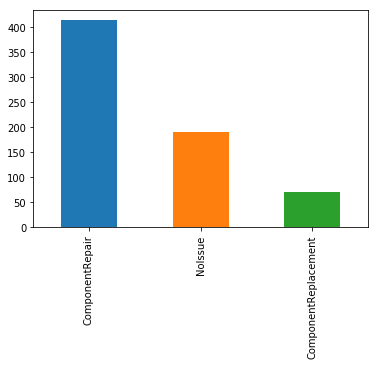

In [76]:
data['ActionPoint'].value_counts().plot.bar()

In [77]:
data['ActionPoint'].unique()

array(['ComponentRepair', 'NoIssue', 'ComponentReplacement'], dtype=object)

In [78]:
X = data.drop(['ActionPoint','MachineID'],axis=1)

In [79]:
y = data['ActionPoint']

In [80]:
TestFrame = pd.read_csv("TestDataFrame_Sai.csv")

In [81]:
aft_tst_DRP = TestFrame.drop(['MachineID'],axis=1)

##### Train_Test_SPLIT

In [82]:
# to divide train and test set
from sklearn.model_selection import train_test_split

In [83]:
# Let's separate into train and test set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=123)

In [84]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Validation Features Shape:', X_val.shape)
print('Validation Target Shape:', y_val.shape)

Training Features Shape: (471, 24)
Training Labels Shape: (471,)
Validation Features Shape: (203, 24)
Validation Target Shape: (203,)


In [85]:
Train.dtypes

MachineID      object
ActionPoint    object
dtype: object

##### Model Building

In [86]:
from sklearn.svm import SVC
supportvector = SVC(C=1.0,kernel='rbf',class_weight='balanced',probability=True)

In [87]:
supportvector.fit(X_train,y_train)

C:\Users\Pavilion\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [88]:
#Predicting On validation set
predictions = supportvector.predict(aft_tst_DRP)

In [89]:
predictions_count = np.unique(predictions,return_counts=True)

In [90]:
print(predictions_count[0])
print(predictions_count[1])

['ComponentRepair' 'NoIssue']
[325   1]


In [91]:
### Predicting the Validation Accuracy and classification Report
from sklearn.metrics import f1_score,accuracy_score,classification_report
print(f1_score(y_val, supportvector.predict(X_val),average='micro'))
print(classification_report(y_val,supportvector.predict(X_val)))

0.5911330049261084
                      precision    recall  f1-score   support

     ComponentRepair       0.59      1.00      0.74       120
ComponentReplacement       0.00      0.00      0.00        23
             NoIssue       0.00      0.00      0.00        60

            accuracy                           0.59       203
           macro avg       0.20      0.33      0.25       203
        weighted avg       0.35      0.59      0.44       203



C:\Users\Pavilion\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [92]:
submission = pd.read_csv('sample_submission.csv')
submission['ActionPoint']=predictions
submission.head()

,Unnamed: 0,MachineID,ActionPoint
0,1,MID11006,ComponentRepair
1,2,MID11007,ComponentRepair
2,3,MID11039,ComponentRepair
3,4,MID11045,ComponentRepair
4,5,MID11049,ComponentRepair


In [93]:
submission1 = submission.to_csv('SVM_Basemodel_Predictions_Sai.csv')

In [94]:
import imblearn
# creating object for smote 
sm = SMOTE(random_state=103)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())
X_train_res.shape,y_train_res.shape

((879, 24), (879,))

##### Logistic Regression

In [95]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_res, y_train_res)

C:\Users\Pavilion\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Pavilion\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [96]:
#Predicting On validation set
predictions2 = model.predict(aft_tst_DRP)

In [97]:
predictions2_count = np.unique(predictions2,return_counts=True)

In [98]:
print(predictions2_count[0])
print(predictions2_count[1])

['ComponentRepair' 'ComponentReplacement' 'NoIssue']
[ 44  75 207]


In [99]:
from sklearn.metrics import f1_score,accuracy_score,classification_report
print(f1_score(y_val, model.predict(X_val),average='micro'))
print(classification_report(y_val,model.predict(X_val)))

0.37438423645320196
                      precision    recall  f1-score   support

     ComponentRepair       0.56      0.15      0.24       120
ComponentReplacement       0.22      0.74      0.33        23
             NoIssue       0.45      0.68      0.54        60

            accuracy                           0.37       203
           macro avg       0.41      0.52      0.37       203
        weighted avg       0.49      0.37      0.34       203



In [101]:
submission2 = pd.read_csv('sample_submission.csv')
submission2['ActionPoint']=predictions2
submission2.head()

,Unnamed: 0,MachineID,ActionPoint
0,1,MID11006,ComponentReplacement
1,2,MID11007,ComponentReplacement
2,3,MID11039,ComponentRepair
3,4,MID11045,ComponentReplacement
4,5,MID11049,ComponentReplacement


In [102]:
submission2.to_csv('predictions_Sai.csv')

##### KNN Model

In [103]:
#model building using KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train_res, y_train_res)

In [104]:
#Predicting On validation set
predictions1 = knn.predict(aft_tst_DRP)

In [105]:
predictions1_count = np.unique(predictions1,return_counts=True)

In [106]:
print(predictions1_count[0])
print(predictions1_count[1])

['ComponentRepair' 'ComponentReplacement' 'NoIssue']
[192  22 112]


In [107]:
from sklearn.metrics import f1_score,accuracy_score,classification_report
print(f1_score(y_val, knn.predict(X_val),average='micro'))
print(classification_report(y_val,knn.predict(X_val)))

0.49753694581280794
                      precision    recall  f1-score   support

     ComponentRepair       0.61      0.62      0.62       120
ComponentReplacement       0.15      0.17      0.16        23
             NoIssue       0.41      0.37      0.39        60

            accuracy                           0.50       203
           macro avg       0.39      0.39      0.39       203
        weighted avg       0.50      0.50      0.50       203



In [109]:
submission = pd.read_csv('sample_submission.csv')
submission['ActionPoint']=predictions1
submission.head()

,Unnamed: 0,MachineID,ActionPoint
0,1,MID11006,ComponentReplacement
1,2,MID11007,ComponentReplacement
2,3,MID11039,ComponentRepair
3,4,MID11045,ComponentRepair
4,5,MID11049,ComponentReplacement


In [110]:
submission.to_csv('SVM_Basemodel_Predictions_sai.csv')

##### Random Forest

In [111]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=63,max_depth=15, random_state=0, min_samples_leaf= 1)
clf=clf.fit(X_train_res, y_train_res)

In [112]:
#Predicting On validation set
predictions3 = clf.predict(aft_tst_DRP)

In [113]:
predictions3_count = np.unique(predictions3,return_counts=True)

In [114]:
print(predictions3_count[0])
print(predictions3_count[1])

['ComponentRepair' 'ComponentReplacement' 'NoIssue']
[208  16 102]


In [115]:
from sklearn.metrics import f1_score,accuracy_score,classification_report
print(f1_score(y_val, knn.predict(X_val),average='micro'))
print(classification_report(y_val,clf.predict(X_val)))

0.49753694581280794
                      precision    recall  f1-score   support

     ComponentRepair       0.61      0.71      0.66       120
ComponentReplacement       0.25      0.17      0.21        23
             NoIssue       0.46      0.37      0.41        60

            accuracy                           0.55       203
           macro avg       0.44      0.42      0.42       203
        weighted avg       0.53      0.55      0.53       203



In [116]:
submission3 = pd.read_csv('sample_submission.csv')
submission3['ActionPoint']=predictions3
submission3.head()

,Unnamed: 0,MachineID,ActionPoint
0,1,MID11006,ComponentRepair
1,2,MID11007,ComponentRepair
2,3,MID11039,ComponentRepair
3,4,MID11045,ComponentRepair
4,5,MID11049,ComponentReplacement


In [117]:
submission3.to_csv('FinalPREDICTIONS_Sai.csv')

##### Visualizations

##### ======================================================================================================

#### ComplaintsLog Visualization

error2    3399
error3    3239
error1    2902
error4    1659
error5    1429
Name: ErrorID, dtype: int64

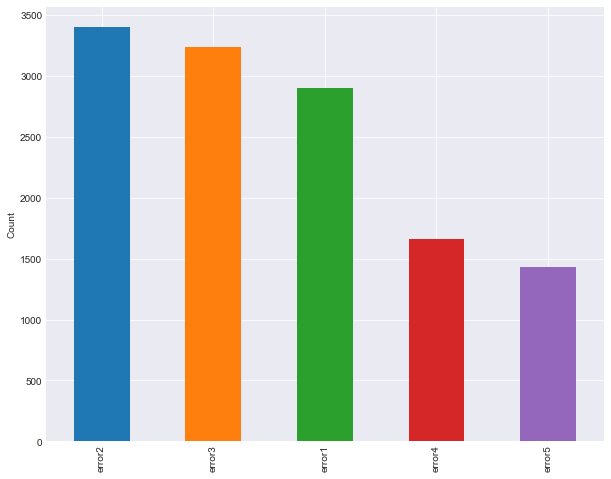

In [118]:
sns.set_style("darkgrid")
plt.figure(figsize=(10, 8))
ComplaintsLog['ErrorID'].value_counts().plot(kind='bar')
plt.ylabel('Count')
ComplaintsLog['ErrorID'].value_counts()

###### Here after plotting the ComplaintsLog['ErrorID'] it's showing the frequency of error1,error2 and error3 more as compared to remaining errors

##### ================================================================================================================

#### ComponentReplacementLog Visualization

Component2    2737
Component1    1989
Component4    1319
Component3    1042
Name: ComponentReplacement, dtype: int64

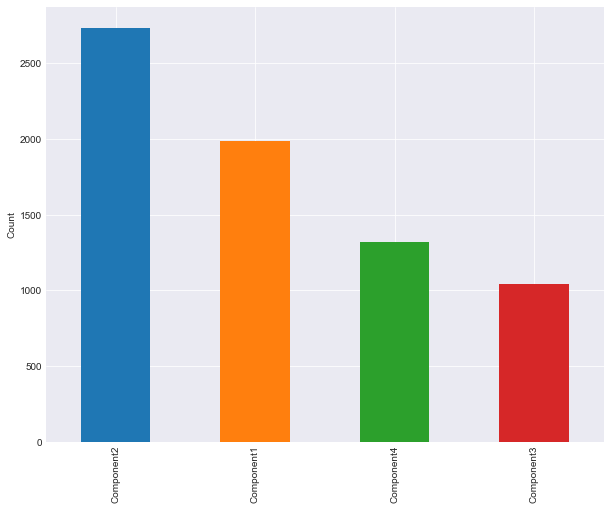

In [119]:
sns.set_style("darkgrid")
plt.figure(figsize=(10, 8))
ComponentReplacementLog['ComponentReplacement'].value_counts().plot(kind='bar')
plt.ylabel('Count')
ComponentReplacementLog['ComponentReplacement'].value_counts()

###### Here after plotting the ComponentReplacementLog['ComponentReplacement'] it's showing the frequency of Component2 is more as compared to remaining Components

##### ===================================================================================================================

C:\Users\Gollas\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


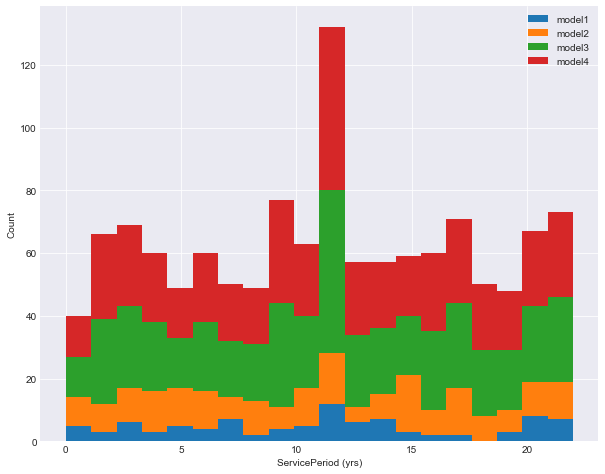

In [120]:
sns.set_style("darkgrid")
plt.figure(figsize=(10, 8))
_, bins, _ = plt.hist([MachinesDetails.loc[MachinesDetails['MachineModel'] == 'model1', 'ServicePeriod'],
                       MachinesDetails.loc[MachinesDetails['MachineModel'] == 'model2', 'ServicePeriod'],
                       MachinesDetails.loc[MachinesDetails['MachineModel'] == 'model3', 'ServicePeriod'],
                       MachinesDetails.loc[MachinesDetails['MachineModel'] == 'model3', 'ServicePeriod']],
                       20, stacked=True, label=['model1', 'model2', 'model3', 'model4'])
plt.xlabel('ServicePeriod (yrs)')
plt.ylabel('Count')
plt.legend()


###### visualizing hist plot on the machine Model with count of it's service period: Model4 count is more as compared to remaing models

##### ==================================================================================================================

##### ComponentServiceLog Visualization

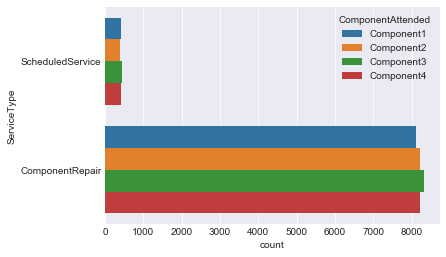

In [121]:
sns.countplot(y='ServiceType', hue='ComponentAttended', data=ComponentServiceLog)

##### After Visualizing ComponentServiceLog it shows that all the componenets are equally attended